# Task-1 Exploratory Data Analysis - Retail

## Some Important Questions That Need to be Answered About This Data Set
#### 1. Which Category of Items are Most Popular ? 
#### 2. Which Category of Items Had Maximum Sales ?
#### 3. Which Sub-Category of Items Had Maximum Sales ?
#### 4. How do Sales Vary With Region ?
#### 5. How do Sales Vary With State ?
#### 6. Which Sub-Category of Items has the Maximum Profits and Loss, how does it vary it with region ?
#### 7. Which Sub- Category had the maximum and minimum profits, how did it vary it with the Segment ?
#### 8. Which Sub- Category had the maximum and minimum profits, how did it vary it with the ship mode ?


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os
os.getcwd()
os.listdir()

['.ipynb_checkpoints', 'SampleSuperstore.csv', 'Task - 1 EDA- Retail.ipynb']

In [4]:
df = pd.read_csv('SampleSuperstore.csv')

In [5]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [7]:
# Get an idea about the total number of rows and columns
df.shape

(9994, 13)

In [8]:
# Find out about the columns or features
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [9]:
# what are the various data types in columns
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object


- So from the data set we can infer that 'Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub Category' is categorical data with the data type as object. These are 8 out of the total 13 columns.
- The rest 5 columns are numerical values out of which one is postal code and can be dropped.
- We will perform descriptive statistics and Univariate Analysis of the important features and then perform Multivariate Analysis.
- We can say that Profit, Sales, Quantity, Category, Sub-Category are the most relevant features while POstal Code is the least relevant feature.

In [10]:
# lets look at the unique values and missing values if any in the dataset
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

## Data Cleaning (Removing Unnecessary Columns, Missing Values, Duplicates etc)

In [11]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [12]:
# postal code can be dropped for the purpose of stats
df1 = df.drop(columns = ['Country', 'Postal Code'])

In [13]:
df1.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Understanding Numerical Data

In [14]:
df1.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


There is a lot of difference between the mean and extreme values hence we do not have a clear picture.
The profit is very less in come cases and very high in others. Same can be said about Sales. Hence we need to perform some additional stats to get a better understanding of the data. Quantity and Discount seem to be fine.

In [15]:
# We will understand the Profit and Sales columns more in detail
print('The variance of profit column is', df1['Profit'].var())
print('The variance of sales colulmn is', df1['Sales'].var())

The variance of profit column is 54877.79805537905
The variance of sales colulmn is 388434.45530807687


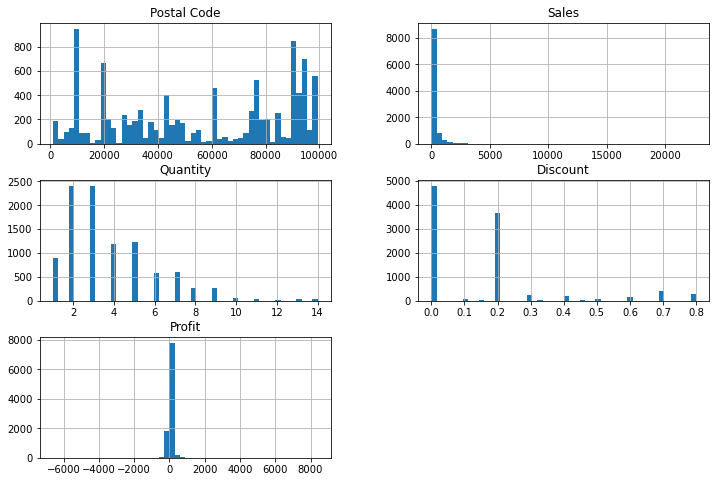

In [51]:
df.hist(figsize=(12,8),bins=50)
plt.show()

In [17]:
df1.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


<AxesSubplot:>

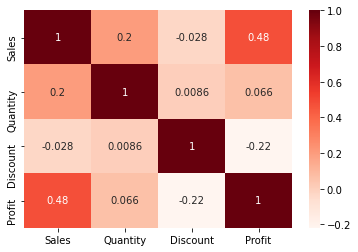

In [52]:
sns.heatmap(df1.corr(), annot = True, cmap = 'Reds')

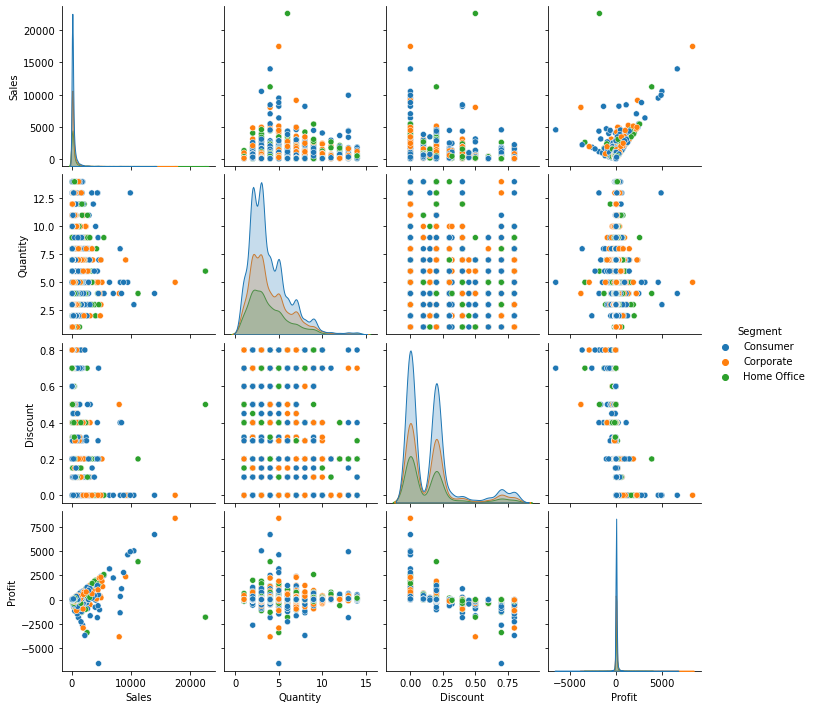

In [53]:
sns.pairplot(df1, hue = 'Segment')

## Understanding Categorical Data 

In [19]:
# we will find out the various types of shipping modes and cities in the data set
df1['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [20]:
df1['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [21]:
df1['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [22]:
df1['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

## 1. Which Category of Items are Most Popular

In [23]:
df_count = df1.groupby('Category').Quantity.sum()
df_count.reset_index()

,Category,Quantity
0,Furniture,8028
1,Office Supplies,22906
2,Technology,6939


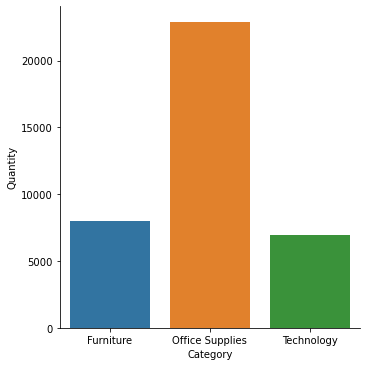

In [24]:
df_count = df1.groupby('Category').Quantity.sum()
sns.catplot(x = 'Category', y = 'Quantity', data = df_count.reset_index(), kind = 'bar')

#### Clearly Office Supplies were ordered the most while Technology was ordered the least

## 2. Which Shipping Mode is Most Popular ?

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

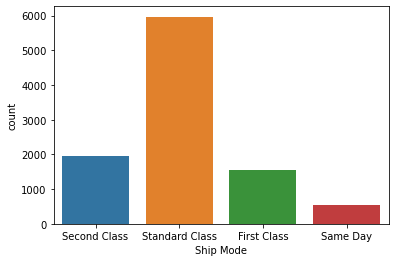

In [55]:
sns.countplot(x = df1['Ship Mode'])

#### Clearly the Standard Class is the Most Popular Mode of shipping

## 3. Which Category of Items had Maximum Sales ?

In [25]:
df2 = df1.groupby(['Category']).Sales.sum()
df2

Category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64

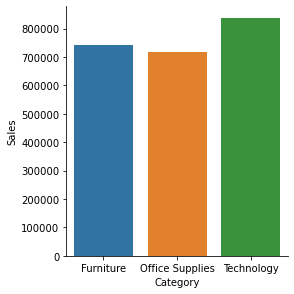

In [26]:
sns.catplot(x = 'Category', y = 'Sales', data = df2.reset_index(), kind = 'bar', height = 4, aspect = 1)

#### Though from the previous graph we say that Office Supplies were ordered the most and Technology the least, maximum Sales were generated from Technology products while Office Supplies generated the least revenue

## 4. Which Sub Category of items had the Maximum Sales ?

In [27]:
# Sales v/s Sub-Category
df3 = df1.groupby(['Sub-Category']).Sales.sum()
df3.sort_values(ascending = False)

Sub-Category
Phones         330007.0540
Chairs         328449.1030
Storage        223843.6080
Tables         206965.5320
Binders        203412.7330
Machines       189238.6310
Accessories    167380.3180
Copiers        149528.0300
Bookcases      114879.9963
Appliances     107532.1610
Furnishings     91705.1640
Paper           78479.2060
Supplies        46673.5380
Art             27118.7920
Envelopes       16476.4020
Labels          12486.3120
Fasteners        3024.2800
Name: Sales, dtype: float64

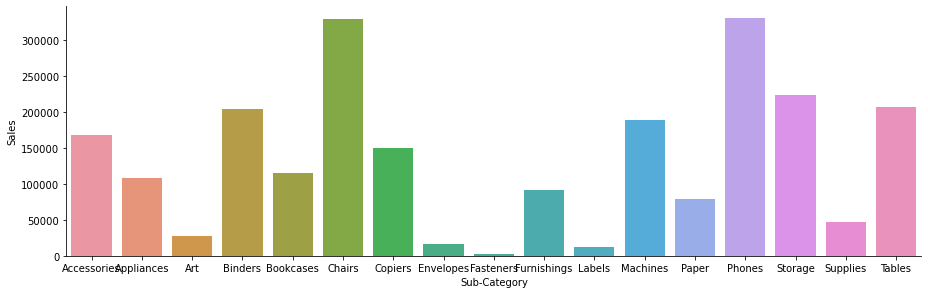

In [28]:
df3 = df1.groupby(['Sub-Category']).Sales.sum()
sns.catplot(x = 'Sub-Category', y = 'Sales', kind = 'bar', data = df3.reset_index(), height = 4.00, aspect = 3.2)

#### From the bar plot we can see that Maximum Sales were for Phones followed by Chairs, Storage, Tables, Binders and Machines 

## 5. How do Sales Vary With Region ?

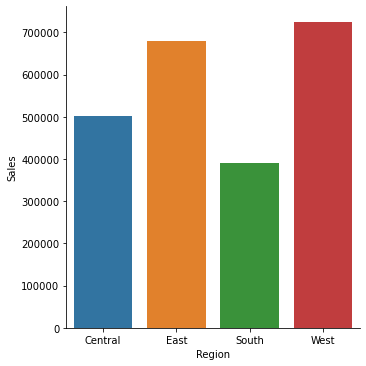

In [29]:
df4 = df1.groupby(['Region']).Sales.sum()
sns.catplot(x = "Region", y = "Sales" , kind = "bar", data = df4.reset_index())

## 6. How do Sales Vary With State ?

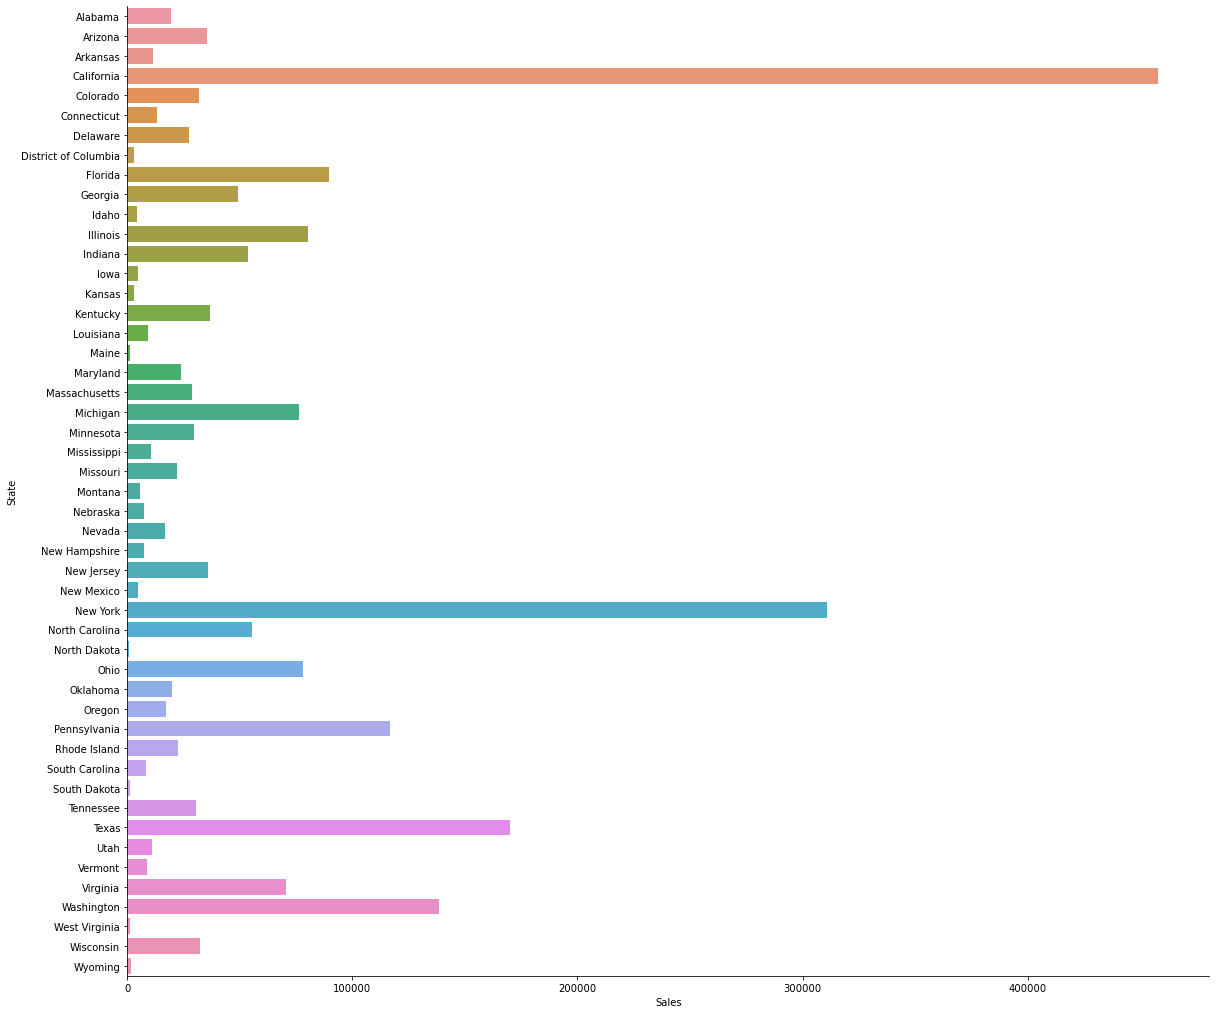

In [30]:
# State v/s Sales
df5 = df1.groupby(['State']).Sales.sum()
sns.catplot(x = "Sales", y = "State" , kind = "bar", height = 14, aspect = 1.2, data = df5.reset_index())

#### From the bar plot we can infer that the Net Sales were maximum in the state of California followed by New York, Texas. The Sales were least in the States of South Dakota, West Virginia, Wyoming, Maine

## 7. Which Sub-Category of Items has the Maximum Profits and Loss, how does it vary it with region ?


In [31]:
df6 = df1.groupby(['Region', 'Sub-Category']).Profit.sum()
df6.reset_index().sort_values('Profit', ascending = False)

,Region,Sub-Category,Profit
57,West,Copiers,19327.2351
23,East,Copiers,17022.8418
51,West,Accessories,16484.5983
54,West,Binders,16096.8016
6,Central,Copiers,15608.8413
...,...,...,...
1,Central,Appliances,-2638.6175
16,Central,Tables,-3559.6504
9,Central,Furnishings,-3906.2168
50,South,Tables,-4623.0579


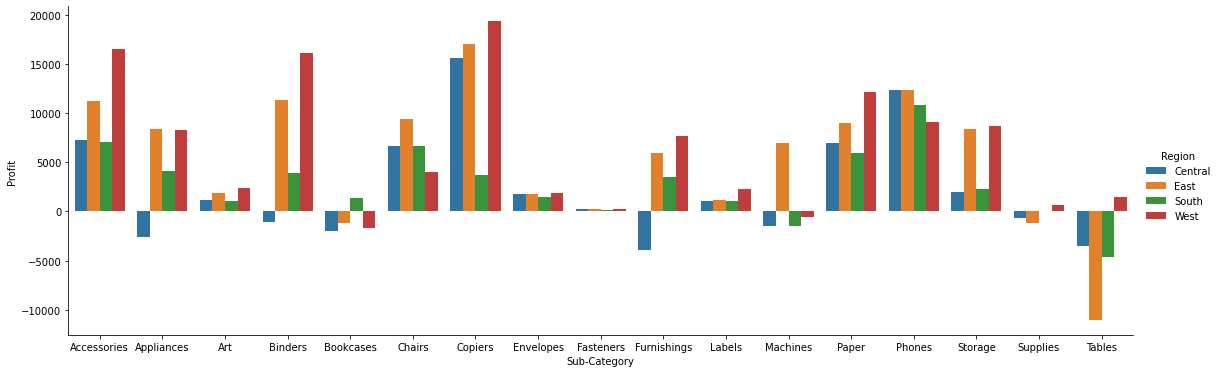

In [57]:
ax = sns.catplot(x = 'Sub-Category', y = 'Profit', data = df6.reset_index(), hue = 'Region', kind = 'bar', height = 5.1, aspect = 3.1, palette = 'tab10')

#### We can infer that in the West region maximum Profit is for Copiers, in the East region it is for Copiers, in the South region max profit is for Phones and in the Central region it is for Copiers. Tables (furniture) suffered a Loss all regions with maximum loss eing in the Eastern Region followed by Furnishings in the Central Region.

## 8. Which Sub- Category of Items has the Maximum Profits and Loss, how does it vary it with the Segment ?


In [44]:
df7 = df1.groupby(['Segment', 'Sub-Category']).Profit.sum()
df7.reset_index().sort_values('Profit', ascending = False).head(6)

,Segment,Sub-Category,Profit
6,Consumer,Copiers,24083.7106
13,Consumer,Phones,23837.1147
0,Consumer,Accessories,20735.9225
23,Corporate,Copiers,18990.2789
3,Consumer,Binders,17995.5972
12,Consumer,Paper,15534.6436


In [45]:
df7 = df1.groupby(['Segment', 'Sub-Category']).Profit.sum()
df7.reset_index().sort_values('Profit', ascending = False).tail(6)

,Segment,Sub-Category,Profit
42,Home Office,Fasteners,120.8144
15,Consumer,Supplies,-1657.5513
50,Home Office,Tables,-3090.9447
4,Consumer,Bookcases,-4435.6382
33,Corporate,Tables,-4906.4986
16,Consumer,Tables,-9728.0378


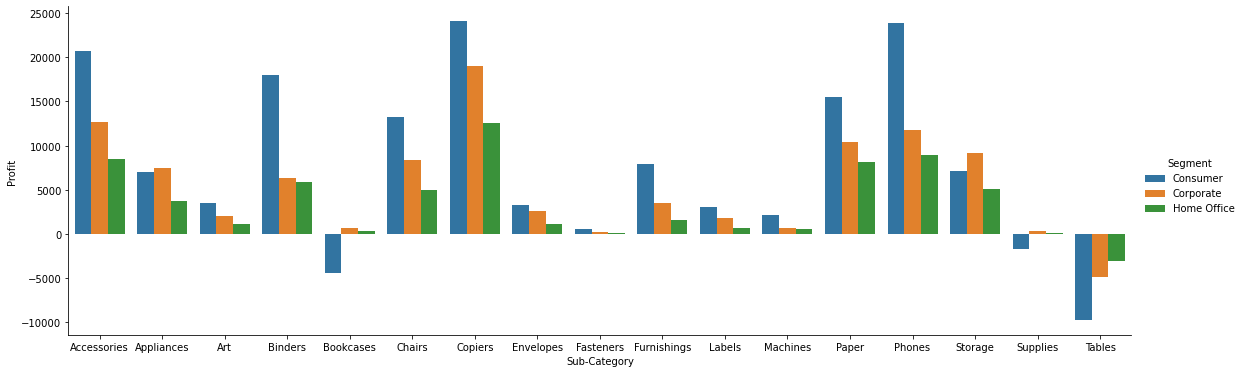

In [42]:
ax = sns.catplot(x = 'Sub-Category', y = 'Profit', data = df7.reset_index(), hue = 'Segment', kind = 'bar', height = 5.1, aspect=3.1)
ax.set(xlabel = 'Sub-Category', ylabel = 'Profit')

#### Amongst the Consumers Copiers generated the maximum profit followed by Phones and Accessories. In the Corporate segment, Copiers generated the maximum profit followed by Accessories and Phones. Amongst the Home-Office category, Copiers again generated the maximum profit followed by Phones and Accessories. Tables generated a loss in all three segments with the maximum loss being among the consumers. Even bookcases suffered a loss in the consumer segment.

## 9. Which Sub- Category of Items has the Maximum Profits and Loss, how does it vary it with the ship mode ?


In [37]:
df_profit = df1.groupby(['Ship Mode', 'Sub-Category']).Profit.sum()
df_profit.reset_index().sort_values('Profit', ascending = False)

,Ship Mode,Sub-Category,Profit
57,Standard Class,Copiers,31354.6204
64,Standard Class,Phones,25953.3506
51,Standard Class,Accessories,23428.8608
54,Standard Class,Binders,19491.9967
63,Standard Class,Paper,19478.8185
...,...,...,...
16,First Class,Tables,-1365.3665
11,First Class,Machines,-1603.4990
55,Standard Class,Bookcases,-2531.1028
50,Second Class,Tables,-3320.6799


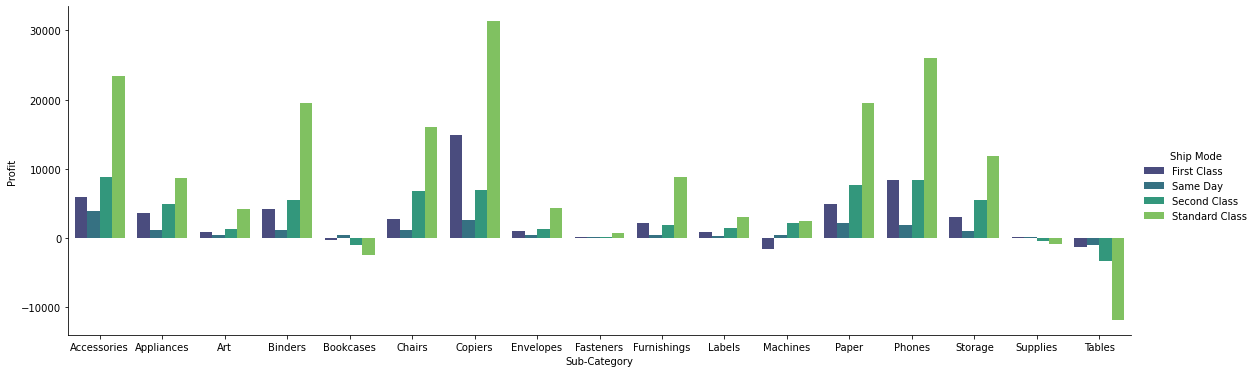

In [59]:
ax = sns.catplot(x = 'Sub-Category', y = 'Profit', data = df_profit.reset_index(), hue = 'Ship Mode', kind = 'bar', height = 5.1, aspect=3.1, palette = 'viridis')
ax.set(xlabel = 'Sub-Category', ylabel = 'Profit')

#### The graph above gives a breakdown the Profits and Loss generated sub-category wise with the shipping mode. Clearly we can see that maximum profit was generated by Copiers and the most popular shipping mode was Standard Class. Tables generated a loss through all modes shipping.

## Observations and Results
#### 1. Which Category of Items are Most Popular ? 
#### - Office Supply Items
#### 2. Which Shipping Mode is Most Popular ?
#### - Standard Class
#### 3. Which Category of Items Had Maximum Sales ?
#### - Technology Items
#### 4. Which Sub-Category of Items Had Maximum Sales ?
#### - Phones
#### 5. How do Sales Vary With Region ?
#### - Maximum in West
#### 6. How do Sales Vary With State ?
#### - Maximum in California, Minimum in Wyoming
#### 7. Which Sub-Category of Items has the Maximum Profits and Loss, how does it vary it with region ?
#### - In West, Max Profit = Copiers, In East  = Copiers, In South  = Phones, In Central Region = Copiers. Tables generated a loss in each region with max loss in Eastern region.
#### 8. Which Sub- Category had the maximum and minimum profits, how did it vary it with the Segment ?
#### - In Consumers Max Profit = Copiers, In Corporate  =  Copiers , In Home-Office Max Profit = Copiers . Tables generated a loss in all three segments with max loss in the consumer sector. 
#### 9. Which Sub- Category had the maximum and minimum profits, how did it vary it with the ship mode ?
#### - Profits were Maximum for Standard Class mode of shipping for Copiers. Loss was highest for Tables which shipped by the Standard Class.